In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

### Task_1 dimensionality reduction

In [8]:
weather_df = pd.read_csv("./data_lab2/weatherAUS.csv")
weather_df.dropna(subset=['RainTomorrow'], inplace=True)
weather_df.fillna(weather_df.mean(), inplace = True)
weather_df['RainToday'] = weather_df.RainToday.astype("category").cat.codes
weather_df['RainTomorrow'] = weather_df.RainTomorrow.astype("category").cat.codes
weather_df['Location'] = weather_df.Location.astype("category").cat.codes
weather_df['WindGustDir'] = weather_df.WindGustDir.astype("category").cat.codes
features_df = weather_df[['Rainfall', 'Sunshine' ,'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm']]
labels_df = weather_df.RainTomorrow.tolist()
features_df

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm
0,0.6,7.624853,44.0,22.0,1007.7,4.503167
1,0.0,7.624853,44.0,25.0,1010.6,4.503167
2,0.0,7.624853,46.0,30.0,1007.6,2.000000
3,0.0,7.624853,24.0,16.0,1017.6,4.503167
4,1.0,7.624853,41.0,33.0,1010.8,8.000000
...,...,...,...,...,...,...
145454,0.0,7.624853,31.0,27.0,1024.7,4.503167
145455,0.0,7.624853,31.0,24.0,1024.6,4.503167
145456,0.0,7.624853,22.0,21.0,1023.5,4.503167
145457,0.0,7.624853,37.0,24.0,1021.0,4.503167


#### apply PCA

components_ :
 [[ 0.11979017 -0.06032389 -0.01819     0.98984275 -0.01051672  0.04220428]
 [ 0.13804777 -0.00811962  0.95358124 -0.00319285 -0.26701394  0.0159077 ]]
explained_variance_ratio_ :
 [0.594054   0.25646594]


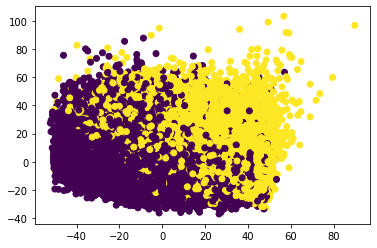

In [17]:
# scaler = StandardScaler()
# features_df = scaler.fit_transform(features_df)

pca = PCA(n_components=2)
pca.fit(features_df)
print(f'components_ :\n {pca.components_}')

#eggvalue/sum(eggvalues) of covar. matrix
# sum of explained_variance_ratio_ should be > 0.95
print(f'explained_variance_ratio_ :\n {pca.explained_variance_ratio_}') 
X = pca.transform(features_df)

plt.scatter(X[:,0], X[:,1], c=labels_df)
plt.show()

#### check model's perfomance

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels_df, test_size=0.25)

rfc = RandomForestClassifier(criterion = 'gini', max_depth=10, n_estimators=50 )
rfc.fit(X_train, Y_train)
preds = rfc.predict(X_test)

print(classification_report(Y_test, preds, target_names=['Yes','No']))
print(confusion_matrix(Y_test, preds))
# less time for model execution

              precision    recall  f1-score   support

         Yes       0.85      0.95      0.90     27573
          No       0.73      0.43      0.54      7976

    accuracy                           0.84     35549
   macro avg       0.79      0.69      0.72     35549
weighted avg       0.82      0.84      0.82     35549

[[26270  1303]
 [ 4521  3455]]


#### apply t-SNE

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


kl_divergence_ :
 3.6112966537475586


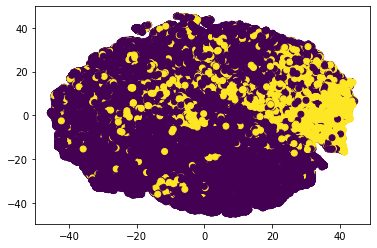

In [19]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(features_df)
print(f'kl_divergence_ :\n {tsne.kl_divergence_}')

plt.scatter(X[:,0], X[:,1], c=labels_df)
plt.show()

### Task_2_1 K-means image quantization

image shape: (256, 256, 3)
64 colors
labels: [12  2  2 ...  3 36  3]
32 colors
labels: [ 8 22 22 ... 15  3 15]
16 colors
labels: [11  7  7 ... 14 14  4]
8 colors
labels: [4 4 4 ... 7 7 7]


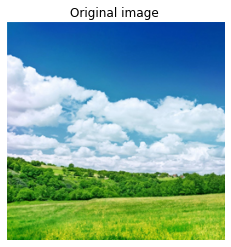

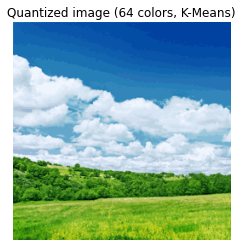

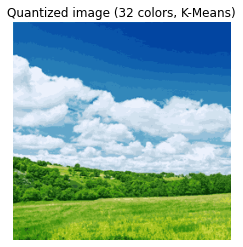

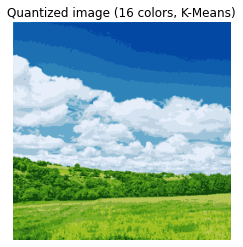

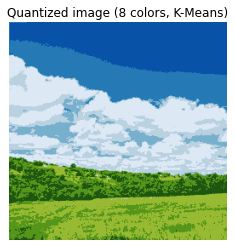

In [11]:
n_colors_list = (64, 32, 16, 8)

image = Image.open("img.jpg")
img_tenzor = np.asarray(image)/255
shape = img_tenzor.shape
print(f"image shape: {shape}")

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image ")
plt.imshow(img_tenzor)

def recreate_image(codebook, labels, width, height):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(width, height, -1)

def kmeans_quantization(n_colors, img_tenzor):
    shape = img_tenzor.shape
    image_array = np.reshape(img_tenzor, (shape[0] * shape[1], shape[2]))

    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    model = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    # Get labels for all points
    labels = model.predict(image_array)
    print(f"labels: {labels}")
    return labels, model.cluster_centers_
    

for i, n_colors in enumerate(n_colors_list):
    print(f'{n_colors} colors')
    labels, centers = kmeans_quantization(n_colors, img_tenzor)
    plt.figure(i+2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(centers, labels, shape[0], shape[1]))

### Task 2_2 EM-clustering

means actual:
 [42. 20.] 
 [70. 32.] 

covariances actual:
 [[42.  0.]
 [30. 33.]] 
 [[ 0. 10.]
 [10. 22.]] 



c:\users\mariia.bondar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]
c:\users\mariia.bondar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


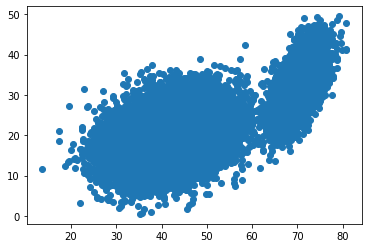

means predicted:
 [[42.04548746 19.98235292]
 [70.03201654 32.08734665]] 

covariances predicted:
 [[[48.58842915 12.25475827]
  [12.25475827 30.92831738]]

 [[ 6.70478641  7.23663481]
  [ 7.23663481 22.52628628]]] 

weights predicted:
 [0.49978106 0.50021894]


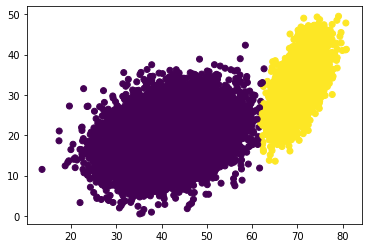

In [12]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

mean1 = np.array([42,20], dtype=np.float64)
mean2 = np.array([70,32], dtype=np.float64)
cov1 = np.array([[42, 0], [30, 10]], dtype=np.float64)
cov2 = np.array([[0, 10], [10, 22]], dtype=np.float64)
print(f'means actual:\n {mean1} \n {mean2} \n')
print(f'covariances actual:\n {cov1} \n {cov2} \n')
 
    
x1= np.random.multivariate_normal(mean1, cov1, (100, 100))
x2= np.random.multivariate_normal(mean2, cov2, (70, 70))
x1 = np.reshape(x1, (100 * 100, 2))
x2 = np.reshape(x2, (70 * 70, 2))
full = np.vstack([x1, x2])
full_shuffled = shuffle(full, random_state=42)

plt.scatter(full_shuffled[:,0], full_shuffled[:,1])
plt.show()

gaussian_model = GaussianMixture(n_components=2, random_state=0, tol=0.00001, covariance_type='full')
gaussian_model.fit(full_shuffled)
print(f'means predicted:\n {gaussian_model.means_} \n')
print(f'covariances predicted:\n {gaussian_model.covariances_} \n')
print(f'weights predicted:\n {gaussian_model.weights_}')

result = gaussian_model.predict(full_shuffled) 
plt.scatter(full_shuffled[:,0], full_shuffled[:,1], c=result)
plt.show()

### Task3 text clasification

In [7]:
import pandas as pd
from functools import reduce
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.decomposition import LatentDirichletAllocation

#### load data

In [8]:
with open('./data_lab3/SMSSpamCollection.txt', 'r') as file:
    text = list(map(lambda line: line.strip('\n').lower().split('\t'),file.readlines()))
    
df = pd.DataFrame(text, columns=['label', 'message'])
df

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,this is the 2nd time we have tried 2 contact u...
5570,ham,will ü b going to esplanade fr home?
5571,ham,"pity, * was in mood for that. so...any other s..."
5572,ham,the guy did some bitching but i acted like i'd...


#### filter and clean data

In [9]:
stemmer = PorterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_punctuation(text_str):
    result = ""
    for c in text_str:
        # If char is not punctuation, add it to the result.
        if c not in string.punctuation and c!='':
            result += c
    return result

def remove_stopwrds(list_str):
    filtered_list = []
    for w in list_str:
        # If a word is not in stopwords, add it to the result.
        if w not in stop_words:
            filtered_list.append(w)
    return filtered_list

def stemming(list_str):
    stemmed_list = []
    for word in list_str:
        stemmed_list.append(stemmer.stem(word))
    return stemmed_list
# ' '.join([str(elem) for elem in stemmed_list])

df['label'] = df.label.astype("category").cat.codes    
df['message'] = df.message.apply(remove_punctuation)
df['message'] = df.message.apply(lambda x: remove_stopwrds(x.split(' ')))
df['message'] = df.message.apply(lambda x: list(filter(None, x)))
# df['message'] = df.message.apply(lambda x: stemming(x))
# df['message'] = df.message.apply(lambda x: ' '.join([str(elem) for elem in x]))

df

[nltk_data] Downloading package stopwords to /Users/masha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5569,1,"[2nd, time, tried, 2, contact, u, u, £750, pou..."
5570,0,"[ü, b, going, esplanade, fr, home]"
5571,0,"[pity, mood, soany, suggestions]"
5572,0,"[guy, bitching, acted, like, id, interested, b..."


#### create wordclouds

len of ham_word_list: 40183
len of spam_word_list: 12540


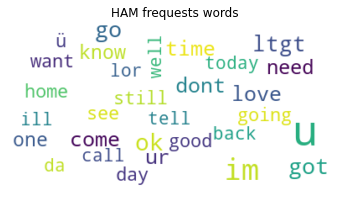

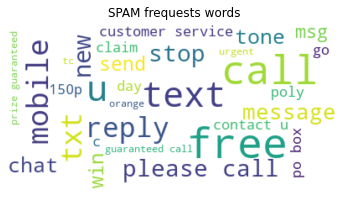

In [10]:
ham_word_list = df[df.label==0].explode('message').message
spam_word_list = df[df.label==1].explode('message').message
print(f'len of ham_word_list: {len(ham_word_list)}\nlen of spam_word_list: {len(spam_word_list)}')

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(' '.join([str(elem) for elem in ham_word_list]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"HAM frequests words")
plt.axis("off")
plt.show()

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(' '.join([str(elem) for elem in spam_word_list]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"SPAM frequests words")
plt.axis("off")
plt.show()

#### show most common words amount

In [11]:
ham_word_dict = Counter(ham_word_list)
spam_word_dict = Counter(spam_word_list)
ham_most_common = dict(ham_word_dict.most_common(20))
spam_most_common = dict(spam_word_dict.most_common(20))

print(f'20 ham_most_common: {ham_most_common}')
print(f'20 spam_most_common: {spam_most_common}')

20 ham_most_common: {'u': 985, 'im': 451, '2': 309, 'get': 303, 'ltgt': 276, 'ok': 273, 'dont': 265, 'go': 250, 'ur': 246, 'ill': 238, 'got': 232, 'know': 232, 'like': 231, 'call': 231, 'come': 227, 'good': 224, 'love': 190, 'time': 189, 'day': 188, '4': 174}
20 spam_most_common: {'call': 347, 'free': 216, '2': 173, 'txt': 150, 'u': 147, 'ur': 144, 'mobile': 123, 'text': 120, '4': 119, 'stop': 115, 'claim': 113, 'reply': 101, 'prize': 92, 'get': 83, 'new': 69, 'send': 68, 'nokia': 65, 'urgent': 63, 'cash': 62, 'win': 60}


#### split data and apply text vectorizer

In [12]:
df['message'] = df.message.apply(lambda x: ' '.join([str(elem) for elem in x]))
df_train, df_test = train_test_split(df, shuffle=True, test_size=0.25)
Y_train = df_train['label']
X_train = df_train['message']
Y_test = df_test['label']
X_test = df_test['message']
# token_pattern=r'(?u)\b\w+\b'
tfid_vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b')# find the word importance per document (TF*IDF)
count_vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')

X_tfid_train = tfid_vectorizer.fit_transform(X_train).toarray()
X_tfid_test = tfid_vectorizer.transform(X_test).toarray()
X_cnt_train = count_vectorizer.fit_transform(X_train).toarray()
X_cnt_test = count_vectorizer.transform(X_test).toarray()

feature_names = count_vectorizer.get_feature_names()

print(X_tfid_train.shape)
print(X_tfid_test.shape)
print(X_cnt_train.shape)
print(X_cnt_test.shape)
print(len(feature_names))

(4180, 8085)
(1394, 8085)
(4180, 8085)
(1394, 8085)
8085


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### apply clasification models

In [15]:
mnb = MultinomialNB(alpha=0.1)#laplass smoosing
gnb = GaussianNB(var_smoothing=0.0)

mnb.fit(X_cnt_train, Y_train)
mnb_preds = mnb.predict(X_cnt_test)

gnb.fit(X_tfid_train, Y_train)
gnb_preds = gnb.predict(X_tfid_test)

print(f'confusion_matrix for MultinomialNB predictions:\n{confusion_matrix(y_pred=mnb_preds, y_true=Y_test)}')
print(f'confusion_matrix for GaussianNB predictions:\n{confusion_matrix(y_pred=gnb_preds, y_true=Y_test)}')
print(f'accuracy_score for MultinomialNB predictions:\n{accuracy_score(y_pred=mnb_preds, y_true=Y_test)}')
print(f'accuracy_score for GaussianNB predictions:\n{accuracy_score(y_pred=gnb_preds, y_true=Y_test)}')

confusion_matrix for MultinomialNB predictions:
[[1188    5]
 [   9  192]]
confusion_matrix for GaussianNB predictions:
[[1126   67]
 [   5  196]]
accuracy_score for MultinomialNB predictions:
0.9899569583931134
accuracy_score for GaussianNB predictions:
0.9483500717360115


#### topics extraction

In [17]:
def find_topics(model, n_top_words, feature_names):
    for topic_idx, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1] #get idxs in sorted list asc, get last n items
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        print(list(map(lambda x, y: (x,y), top_features, weights)), '\n')

ham_train_df = df_train[df_train['label']==0]['message']
span_train_df = df_train[df_train['label']==1]['message']
ham_train = count_vectorizer.fit_transform(ham_train_df).toarray()
span_train = count_vectorizer.fit_transform(span_train_df).toarray()

lda = LatentDirichletAllocation(n_components=5, random_state=0)

lda.fit(ham_train)
ham_train_lda_transformed = lda.transform(ham_train)
print(f"ham topics: ")
find_topics(lda, 10, feature_names)

lda.fit(span_train)
span_train_lda_transformed = lda.transform(span_train)

print(f'\nspan topics: ')
find_topics(lda, 10, feature_names)

ham topics: 
[('gre', 127.54948977407255), ('freeentry', 78.91607731661072), ('re', 73.6308532233374), ('getiing', 69.27796222443449), ('day2', 60.13164694282531), ('mundhe', 57.365764938954435), ('alert', 50.91009648926011), ('cal', 43.387728925495196), ('detailsi', 42.18893754281518), ('prayers', 38.77393150393396)] 

[('re', 111.76451882873458), ('itwhichturnedinto', 68.10091529212612), ('def', 67.0821176718073), ('ese', 58.69049654722303), ('audreys', 46.66817019114708), ('incredible', 38.88277228648031), ('easter', 37.89926199049355), ('propose', 33.27284994024247), ('07801543489', 29.037190309323297), ('gre', 27.19060552619455)] 

[('re', 170.10795619752724), ('esaplanade', 157.55604285507997), ('ahhhhjust', 152.36248348867304), ('ese', 104.06329244090068), ('cal', 99.82364266477403), ('funky', 96.25813056327661), ('deciding', 82.03865258718308), ('okday', 78.05009979904816), ('day2', 73.05502070692955), ('bigger', 60.749031467218494)] 

[('re', 202.9335385552743), ('reformat', 1